In [1]:
# %matplotlib inline
# %load_ext tensorboard

In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = str(0)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

2023-06-11 09:11:22.861683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 09:11:23.081883: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-11 09:11:24.015270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-06-11 09:11:24.015406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic

In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) 
[GCC 9.4.0]
matplotlib 3.5.3
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.10.1
keras.api._v2.keras 2.10.0


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

In [5]:
from Mike_NB_tools import *
from Transformer import *

In [7]:
from Test_Hack import *

from Test import *
upgrade_file("Test.py")

ModuleNotFoundError: No module named 'Hack'

In [6]:
a = np.array([1,2,3], dtype=np.float32)
square = get_square(a)
print(square)

NameError: name 'get_square' is not defined

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

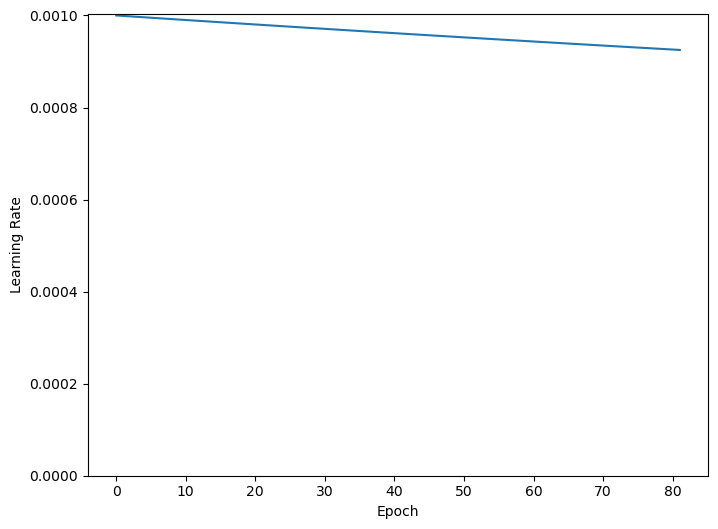

In [6]:
STEPS_PER_EPOCH = 1234

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001, # default: 0.001 
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [ ]:
y_true = tf.constant([ [ [0,3,7], [3,0,5], [3,4,5] ], [ [6,0,6], [7,5,3], [5,6,7] ], ], dtype=float)
y_pred = tf.constant([ [ [6,23,3], [3,5,2], [5,6,7] ], [ [7,7,10], [8,5,16], [6,7,8] ], ], dtype=float)

In [ ]:
lossObject = MaskedMSE()
loss = lossObject(y_true, y_pred, tf.constant(0.1))
print(loss)

metricObject = MaskedMSE_Metric()
metricObject.update_state(y_true, y_pred, tf.constant(0.1))
metricObject.update_state(y_true, y_pred)
metricObject.update_state(y_true, y_pred)
metric = metricObject.result()
# metric = metricObject.update_state(y_true, y_pred)
print(metric)

In [ ]:
lossFun = MaskedHuber()
loss = lossFun(y_true, y_pred, tf.constant(0.1))
print(loss)

metricObject = MaskedHuber_Metric()
metricObject.update_state(y_true, y_pred, tf.constant(0.1))
metricObject.update_state(y_true, y_pred)
metricObject.update_state(y_true, y_pred)
metric = metricObject.result()
# metric = metricObject.update_state(y_true, y_pred)
print(metric)

y_true = tf.constant([ [ [0,3,7], [3,0,5], [3,4,5] ], [ [6,0,6], [7,5,3], [5,6,7] ], ], dtype=float)
y_pred = tf.constant([ [ [6,23,3], [3,5,2], [5,6,7] ], [ [7,7,10], [8,5,16], [6,7,8] ], ], dtype=float)

mask =   [ [ [ 0,  0,   1], [1,  0,  1] ], [ [1,   0,   1], [ 1,  1,   1] ] ], sum = 8
d_true = [ [ [ 3, -3,  -2], [0,  4,  0] ], [ [1,   5,  -3], [-2,  1,   4] ] ]
d_pred = [ [ [-3, -18, -1], [2,  1,  5] ], [ [1,  -2,   6], [-2,  2,  -8] ] ]
codir =  [ [ [ 0,  1,   1], [0,  1,  0] ], [ [1,   0,   0], [ 1,  1,   0] ] ]
masked=  [ [ [ 0,  0,   1], [0,  0,  0] ], [ [1,   0,   0], [ 1,  1,   0] ] ] , sum = 4
rate = 0.5

In [ ]:
lossFun = MaskedTrendError()
loss = lossFun(y_true, y_pred, tf.constant(0.1))
print(loss)

metricObject = MaskedTrendError_Metric()
metricObject.update_state(y_true, y_pred, tf.constant(0.1))
metricObject.update_state(y_true, y_pred)
metricObject.update_state(y_true, y_pred)
metric = metricObject.result()
# metric = metricObject.update_state(y_true, y_pred)
print(metric)

metricObject = MaskedTrendAccuracy_Metric()
metricObject.update_state(y_true, y_pred, tf.constant(0.1))
metricObject.update_state(y_true, y_pred)
metricObject.update_state(y_true, y_pred)
metric = metricObject.result()
# metric = metricObject.update_state(y_true, y_pred)
print(metric)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            # logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            # print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
from datetime import datetime, timedelta
import sys 
sys.path.append('..')
import json

In [ ]:
# ============================  Define training parameters ===========================

Nx = 600
Ny = 5
Ns = 5 #--------------------- test
BatchSize = 64

CandleFile = "18-01-01-00-00-23-05-20-20-23-5m"
SmallSigma = 1
LargeSigma = 30
eFreeNoLog = True

nFiles_t = 70
nFiles_v = 30
n_readers = 20
shuffle_batch = 200
nPrefetch = tf.data.AUTOTUNE

dir_datasets = "/mnt/data/Trading/Datasets"
dir_candles = "/mnt/data/Trading/Candles"

min_true_candle_percent_x = 40
chosen_markets_x = []
chosen_fields_x = ['ClosePrice'] #, 'BaseVolume']
min_true_candle_percent_y = 40
chosen_markets_y = []
chosen_fields_y = ['ClosePrice']

Standardization = True
Time_into_X = True
Time_into_Y = True      # True to prevent data contamination
Transformer = True
Reuse_files = False
eFreeNoPlot = False

Epochs_Initial = 5

Num_Layers = 6
Num_Heads = 1
Factor_FF = 4
repComplexity = 6
Dropout_Rate = 0.1


In [ ]:
#==================== Load candle data into 'table' with shape of (time, markets, 10 fields) ====================
Candles = np.load( os.path.join( dir_candles, "table-" + CandleFile + ".npy") )
Candles = np.swapaxes(Candles, 0, 1)
print("Candles: {}".format(Candles.shape))

In [ ]:
market = 5
Show_Price_Volume_10(Candles[:, market, :], 1, 1, 5000)

In [ ]:
Event_Free_Learning_Scheme_10(Candles[:, market, :], 3, 30, 5000)

In [ ]:
#==================== Delete 7 candle fields from 'Candles'. ====================
# Candles.shape becomes (time, markets, ['ClosePrice', 'BaseVolume', 'BuyerBaseVolume'] )

CandleMarks = Candles[:, :, 9] # keep it for later use
Candles = np.delete(Candles, [0, 1, 2, 5, 6, 8, 9], axis = 2) # delete Open, High, Low, qVolume, #Trades, bQVolume, CandleMarks

table_markets = []
with open( os.path.join( dir_candles, "reports-" + CandleFile + ".json"), "r") as f:
    reports = json.loads(f.read())
print(reports[:2])

markets = [ s[0: s.find(':')] for s in reports if 'Success' in s ]
assert Candles.shape[1] == len(markets)
print(Candles.shape, len(markets), markets[:2])

In [ ]:
#==================== Restore timestamps_abs. ====================

start = datetime( 2000+int(CandleFile[0:2]), int(CandleFile[3:5]), int(CandleFile[6:8]), int(CandleFile[9:11]), int(CandleFile[12:14]) )
start_ts = round(datetime.timestamp(start))
interval = CandleFile[ CandleFile.find('-', len(CandleFile) - 4) + 1 : ]
interval_s = round(intervalToMilliseconds(interval) / 1000)
timestamps_abs = np.array( range(start_ts, start_ts + Candles.shape[0] * interval_s, interval_s), dtype=int)
assert timestamps_abs.shape[0] == Candles.shape[0]
print(start_ts, interval_s, timestamps_abs.shape, timestamps_abs[:3])

In [ ]:
parse_csv_line_to_tensors(b'0., 1., 2., 3., 4., 5., 6., 7., 222., 333., 8., 9., 10., 11., 444., 555.', 2, 4, 2, 2, True, True, 1) # nx, size_x, ny, size_y, time_x, time_y, sixe_time

In [ ]:
parse_csv_line_to_tensors(b'0., 1., 2., 3., 4., 5., 6., 7., 222., 333., 8., 9., 10., 11.', 2, 4, 2, 2, True, False, 1) # nx, size_x, ny, size_y, time_x, time_y, sixe_time

In [ ]:
parse_csv_line_to_tensors(b'0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11.', 2, 4, 2, 2, False, False, 1) # nx, size_x, ny, size_y, time_x, time_y, sixe_time

In [ ]:
parse_csv_line_to_tensors_for_transformer(b'0., 1., 2., 3., 4., 5., 6., 7., 222., 333., 8., 9., 10., 11., 444.', 2, 4, 1, 4, True, True, 1) # nx, size_x, ny, size_y, time_x, time_y, sixe_time

In [ ]:
parse_csv_line_to_tensors_for_transformer(b'0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11.', 2, 4, 1, 4, False, False, 1) # nx, size_x, ny, size_y, time_x, time_y, sixe_time

In [ ]:
# defind test data

n_times = 1000; n_markets = 2; n_fields = 2
data = [ [ [ time * n_markets * n_fields + market * n_fields + field for field in range(n_fields) ] for market in range(n_markets) ] for time in range(n_times)]
data = np.array(data, dtype=float)
times_test = np.array( range(data.shape[0]) ) + 100000
print(data.shape, times_test.shape)   # time, market, field
print(data[:2, :, :])

In [ ]:
print(data.shape, times_test.shape)   # time, market, field

In [ ]:
nx_test = 2
ny_test = 2
ns_test = 10
batchSize = 2

sample_anchors = range(0, data.shape[0] - nx_test - ny_test, ns_test)
print(data.shape[0], len(sample_anchors), sample_anchors)

x_indices = ( (0, 1), (0, 1) )    # (market, field)
y_indices = ( (0, 1), (0, 1) )    # (market, field)
print(data[0:2][:, x_indices[0]][:, :, x_indices[1]])
print(data[2:4][:, y_indices[0]][:, :, y_indices[1]])

size_x = get_timepoint_size(x_indices)
size_y = get_timepoint_size(y_indices)
size_time = 1
print(size_x, size_y, size_time)


In [ ]:
name_plus = CandleFile+'_o'
name_prefix = os.path.join(dir_datasets, name_plus)

reuse_files = False

if reuse_files:
    import re
    filenames = [ os.path.join(dir_datasets, x) for x in os.listdir(dir_datasets) if re.match(name_plus, x)]
else:
    os.system("rm {}/*{}*".format(dir_datasets, name_plus))
    filenames = divide_to_multiple_csv_files(data, True, True, times_test, sample_anchors, name_prefix, nx_test, x_indices, ny_test, y_indices, header=None, n_parts=10)

print(filenames)

In [ ]:
filename_dataset = tf.data.Dataset.list_files(filenames, shuffle=None) # no way to prevent shuffle.
print(filename_dataset.cardinality().numpy())
for element in filename_dataset:
    print(element.numpy())

In [ ]:
ds = tf.data.TextLineDataset(filenames[0])
for line in ds.take(20):
    print(line.numpy())

In [ ]:
n_readers = 5
dataset = filename_dataset.interleave(
    lambda filename: tf.data.TextLineDataset(filename),
    cycle_length=n_readers, num_parallel_calls=tf.data.AUTOTUNE) # no way to prevent shuffle?

for line in dataset.take(15):
    print(line.numpy())

In [ ]:
dataset = csv_reader_to_dataset(filenames, nx_test, size_x, ny_test, size_y, True, True, size_time,
                             n_parse_threads=5, batch_size=batchSize, shuffle_buffer_size=1000, n_readers=5)

In [ ]:
for element in dataset:
    print(element)
    break

# should print: (None, nx_test, size_x + size_time), (None, ny_test * size_y)

In [ ]:
# Check elements: NaN, -inf, +inf

assert (~np.isfinite(Candles)).any() == False

In [ ]:
nLatest = 500
P, maP, logP, log_maP, event, eventFree = Get_eFree(Candles[:, 0, 0], 1, 30, nLatest)
assert maP.shape[0] == nLatest; assert logP.shape[0] == nLatest; assert log_maP.shape[0] == nLatest; assert event.shape[0] == nLatest; assert eventFree.shape[0] == nLatest


In [ ]:
clusters = [
    ['APT', 'SUI', 'DYDX', 'ANKR', 'AUDIO', 'SKL'],
    ['EOS', 'AAVE', 'FLOW', 'CRV', 'COMP', 'SLP', 'MBOX', 'BNT', 'SPELL', 'AERGO', 'BAKE'],
    ['DOT', 'BTC', 'ETH', 'WBTC', 'LINK', 'ETC', 'XLM', 'TWT', 'SFP', 'STPT', 'STEEM', 'POWR'],
]

for c in range(len(clusters)):
    cluster = clusters[c]
    cluster = [ markets.index(m + 'USDT') for m in cluster ]
    check = [ (markets[m], 100 - round(np.argmax(Candles[:, m, 0]>0) / Candles.shape[0] * 100)) for m in cluster ]
    print(check)

In [ ]:
#==================== Define Data ====================

Data = Candles[:, :, :]   # (time:, all markets, 20 fields)

In [ ]:
#===================== Find marketrank ==================

check = np.array([ np.argmax(Data[:, m, 0]>0) / Data.shape[0] * 100 for m in range(len(markets)) ])
permute = np.argsort(check)
marketrank = [ (markets[m], 100 - round(np.argmax(Data[:, m, 0]>0) / Data.shape[0] * 100)) for m in permute ]
# marketrank = [ markets[m] for m in permute ]

batch = 10
for i in range(0, len(markets), batch):
    print(marketrank[i: i+batch])

In [ ]:
#==================== Select markets and fields ====================

enFields = ['ClosePrice', 'BaseVolume', 'BuyerBaseVolume']

# dot, 1inch, btc, eth, matic, bnb, ada, sol, ltc, avax, wbtc, link, arb, ape, aave, crv, sui, op, gmx, agix, bal, comp, gmt, joe, stg

chosen_markets_x = [ elem[0] for elem in marketrank if elem[1] >= min_true_candle_percent_x ]
chosen_markets_x = tuple([ markets.index(elem) for elem in chosen_markets_x ])
chosen_markets_x = tuple(list(set(chosen_markets_x)))

chosen_fields_x = tuple( [ enFields.index(elem) for elem in chosen_fields_x ] )
chosen_fields_x = tuple(list(set(chosen_fields_x)))
x_indices = ( chosen_markets_x, chosen_fields_x )
print(x_indices)

chosen_markets_y = [ elem[0] for elem in marketrank if elem[1] >= min_true_candle_percent_y ]
chosen_markets_y = tuple([ markets.index(elem) for elem in chosen_markets_y ])
chosen_markets_y = tuple(list(set(chosen_markets_y)))

chosen_fields_y = tuple( [ enFields.index(elem) for elem in chosen_fields_y ] )
chosen_fields_y = tuple(list(set(chosen_fields_y)))
y_indices = ( chosen_markets_y, chosen_fields_y )
print(y_indices)

size_x = get_timepoint_size(x_indices)
size_y = get_timepoint_size(y_indices)
print(size_x, size_y)

chosen_markets = tuple(list(set(chosen_markets_x + chosen_markets_y)))
chosen_fields = tuple(list(set(chosen_fields_x + chosen_fields_y)))
print(chosen_markets, chosen_fields)

print(len(chosen_markets), len(chosen_fields))

In [ ]:
chosen_market_names = [markets[market][:-4] for market in chosen_markets]
batch = 10
for i in range(0, len(chosen_market_names), batch):
    print(chosen_market_names[i: i+batch])
print(len(chosen_market_names))

In [ ]:
#==================== Generate event-free data into Data ====================
# Data loses heading items.
# Do it before: Permute Data in time

alpha = 3; beta = 3 # beta is used in 'get_eFree_with_plot'. Ugly coupling.
event_free_data_loss = 3 * ( alpha * SmallSigma + LargeSigma)
eFree = np.zeros( (Data.shape[0] - event_free_data_loss, len(chosen_markets), len(chosen_fields)), dtype = np.float32 )

for market in chosen_markets:
    for field in chosen_fields:
        sSigma = SmallSigma
        if enFields[field] == 'BaseVolume': sSigma = SmallSigma * alpha
        P, maP, logP, log_maP, event, eventFree = \
        get_eFree_with_plot(markets[market], enFields[field], Data[:, market, field], sSigma, 
                            LargeSigma, Data.shape[0] - event_free_data_loss, noPlot=eFreeNoPlot, noLog=eFreeNoLog)
        Data[event_free_data_loss:, market, field] = eventFree

Data = Data[event_free_data_loss: ]

print(Data.shape)

In [ ]:
#==================== Define time features, to augment Data with ====================

sigma = np.power(2.0, -0.2)
hourly = np.sin( 2 * np.pi / (60*60) * timestamps_abs ) / sigma
daily = np.sin( 2 * np.pi / (60*60*24) * timestamps_abs ) / sigma
weekly = np.sin( 2 * np.pi / (60*60*24*7) * timestamps_abs ) / sigma
yearly = np.sin( 2 * np.pi / (60*60*24*365) * timestamps_abs ) / sigma

Time = np.stack([hourly, daily, weekly, yearly], axis=1)
size_time = Time.shape[1]

Time = Time[event_free_data_loss: ]
assert Data.shape[0] == Time.shape[0]
print(Candles.shape, Time.shape)

In [ ]:
#==================== Standardize Data on chosen markets and fields ====================

Standard = []

if Standardization:
    for market in chosen_markets:
        for field in chosen_fields:
            nzPs = np.where( Data[:, market, field] != 0.0 ) [0]
            mu = np.average(Data[nzPs, market, field])
            sigma = np.std(Data[nzPs, market, field])
            standard = (Data[nzPs, market, field] - mu) / (sigma + 1e-15)
            Standard.append( (market, field, mu, sigma) )
            Data[nzPs, market, field] = standard

    Standard = np.array(Standard)

In [ ]:
fig = plt.figure(figsize=(16,3))
ax = fig.add_subplot(111)
ax.set_title("Features are custom-standardized" if Standardization else "Features are not standardized")
for market in chosen_markets:
    for field in chosen_fields:
        ax.plot(Data[:, market, field], label = "{} @ {}".format(enFields[field], markets[market][:-4])) # -4: 'USDT'
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
#==================== Define input sequence and output sequence ====================

sample_anchors = np.array(range(0, Data.shape[0] - Nx - Ny + 1, Ns))
print(Data.shape[0], len(sample_anchors), sample_anchors, sample_anchors[-1])
print(Data.shape[0], sample_anchors[ -1 ], sample_anchors[ -1 ] + Nx + Ny, sample_anchors[ -1 ] + Ns, sample_anchors[ -1 ] + Ns + Nx + Ny)

for _ in range(10):
    permute = np.random.permutation(sample_anchors.shape[0])
    sample_anchors = sample_anchors[permute]

from sklearn.model_selection import train_test_split
sample_anchores_t, sample_anchores_v = train_test_split(sample_anchors, test_size=0.30, random_state=42)
print(sample_anchores_t.shape, sample_anchores_v.shape)

sample_anchores_t = tuple(sample_anchores_t)
sample_anchores_v = tuple(sample_anchores_v)

In [ ]:
#==================== Create train/valid datasets ====================

name_plus_t = CandleFile+'_t'
name_plus_v = CandleFile+'_v'
name_prefix_t = os.path.join(dir_datasets, name_plus_t)
name_prefix_v = os.path.join(dir_datasets, name_plus_v)

reuse_files = Reuse_files #------------------------------------------------------------------------------------------------------- 

if reuse_files:
    import re
    filenames_train = [ os.path.join(dir_datasets, x) for x in os.listdir(dir_datasets) if re.match(name_plus_t, x)]
    filenames_valid = [ os.path.join(dir_datasets, x) for x in os.listdir(dir_datasets) if re.match(name_plus_v, x)]
else:
    os.system("rm {}/*{}*".format(dir_datasets, name_plus_t))
    os.system("rm {}/*{}*".format(dir_datasets, name_plus_v))
    filenames_train = divide_to_multiple_csv_files(Data, Time_into_X, Time_into_Y, Time, sample_anchores_t, name_prefix_t, Nx, x_indices, Ny, y_indices, header=None, n_parts=nFiles_t)
    filenames_valid = divide_to_multiple_csv_files(Data, Time_into_X, Time_into_Y, Time, sample_anchores_v, name_prefix_v, Nx, x_indices, Ny, y_indices, header=None, n_parts=nFiles_v)

# sample_anchores are already shuffled. But we need to shuffle datasets again, because it will reshuffle at every epoch.
Dataset_train = csv_reader_to_dataset(filenames_train, Nx, size_x, Ny, size_y, Time_into_X, Time_into_Y, size_time,
                             n_parse_threads=5, batch_size=BatchSize, shuffle_buffer_size=BatchSize*shuffle_batch, n_readers=n_readers, transformer=Transformer)
Dataset_train = Dataset_train.prefetch(nPrefetch)

Dataset_valid = csv_reader_to_dataset(filenames_valid, Nx, size_x, Ny, size_y, Time_into_X, Time_into_Y, size_time,
                             n_parse_threads=5, batch_size=BatchSize, shuffle_buffer_size=BatchSize*shuffle_batch, n_readers=n_readers, transformer=Transformer)
Dataset_valid = Dataset_valid.prefetch(nPrefetch)

In [ ]:
for (x, y), y_target in Dataset_train.take(1):
    break
print(x.shape)
print(y.shape)
print(y_target.shape)

In [ ]:
# Build model

dx = size_x + (size_time if Time_into_X else 0)
if Transformer: dx = dx + dx % 2
dy = size_y + (size_time if Time_into_Y else 0)
if Transformer: dy = dy + dy % 2
if Transformer: assert dx == dy

cryptoformer = ConTransformer(
  num_layers=Num_Layers, d_model=dx, num_heads=Num_Heads, dff=Factor_FF*dx, 
  repComplexity=repComplexity, target_dim=dy, dropout_rate=Dropout_Rate
)

cryptoformer.compile(
    loss=MaskedMSE,
    optimizer=keras.optimizers.Adam(
        learning_rate=0.0001,  # def lr = 0.001
        beta_1=0.9,
        beta_2=0.999, 
        epsilon=1e-07
    ),
    metrics=keras.metrics.MSE,       
)

# cryptoformer.summary()

In [ ]:
cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=1)

In [ ]:
cryptoformer.summary()

In [ ]:
# pos = ConPositionalEmbedding(complexity=2, d_model=dx, dff=4*dx, dropout_rate=dropout_rate)
# p = pos(x)
# print(p.shape)
# p = pos(y)
# print(p.shape)

In [ ]:
# encoder = ConEncoder(num_layers=2, d_model=dx, num_heads=1, dff=4*dx, repComplexity=2, dropout_rate=0.1)
# decoder = ConDecoder(num_layers=2, d_model=dy, num_heads=2, dff=4*dy, repComplexity=2, dropout_rate=0.1)
# enc = encoder(x)
# print(enc.shape)
# dec = decoder(x, enc)
# print(dec.shape)

In [ ]:
STEPS_PER_EPOCH = len(sample_anchores_t) // BatchSize

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001, # default: 0.001 
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
#==================== Fit model ====================

history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)
# history_2= model.fit(Dataset_train, validation_data=Dataset_valid, epochs=10, initial epoch=history_1.epoch(-1) )

In [ ]:
plot_history(history)

In [ ]:
# history_2= model.fit(Dataset_train, validation_data=Dataset_valid, epochs=10, initial epoch=history_1.epoch(-1) )

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial)

In [ ]:
plot_history(history)

In [ ]:
history = cryptoformer.fit(Dataset_train, validation_data=Dataset_valid, epochs=Epochs_Initial0)

In [ ]:
plot_history(history)